In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import numpy as np

In [2]:
curr_folder = os.getcwd()
#exp_folder = os.path.join(curr_folder, 'closing_door')
#exp_folder = os.path.join(curr_folder, 'three_gaps')
parent_dir = os.path.abspath(os.path.join(curr_folder, os.pardir))
main_dir = os.path.abspath(os.path.join(parent_dir, os.pardir))

exp_name = curr_folder.split('/')[-1]


/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/04_NN-NN/plot_map.ipynb
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/04_NN-NN/01_street_next
/home/enjay/0_thesis/motion-planning-using-sm-mcts/data_processed/04_NN-NN/01_street_next
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/04_NN-NN/02_plot_data.ipynb
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/04_NN-NN/environment_utilities.py
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/04_NN-NN/plot_data_utilities.py
/home/enjay/0_thesis/motion-planning-using-sm-mcts/results/04_NN-NN/process_data_utilities.py


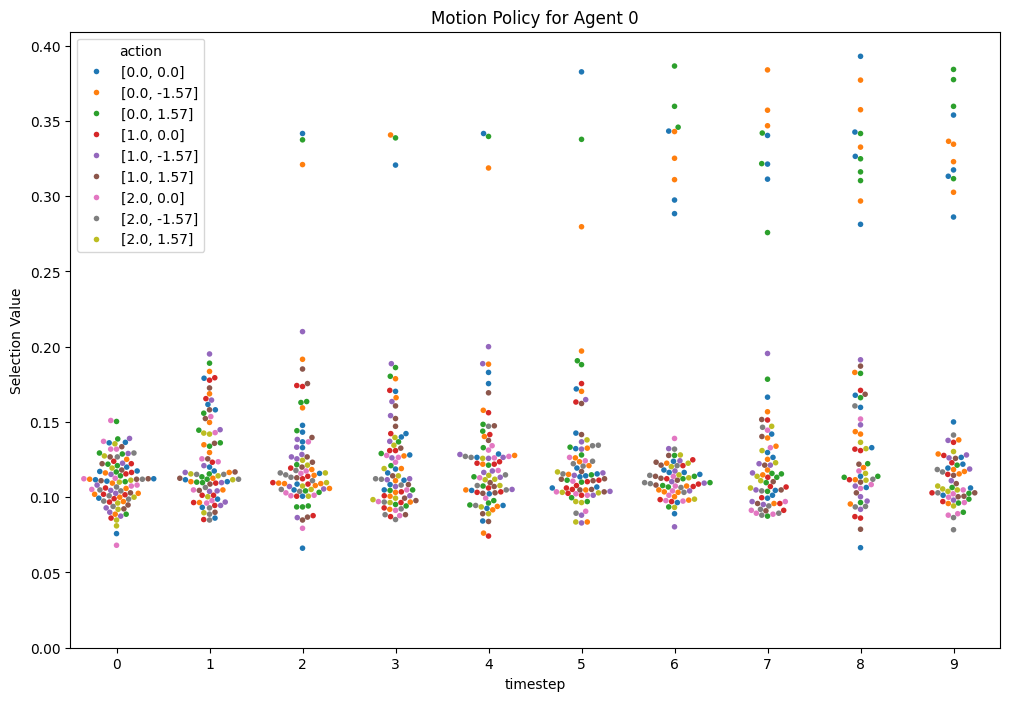

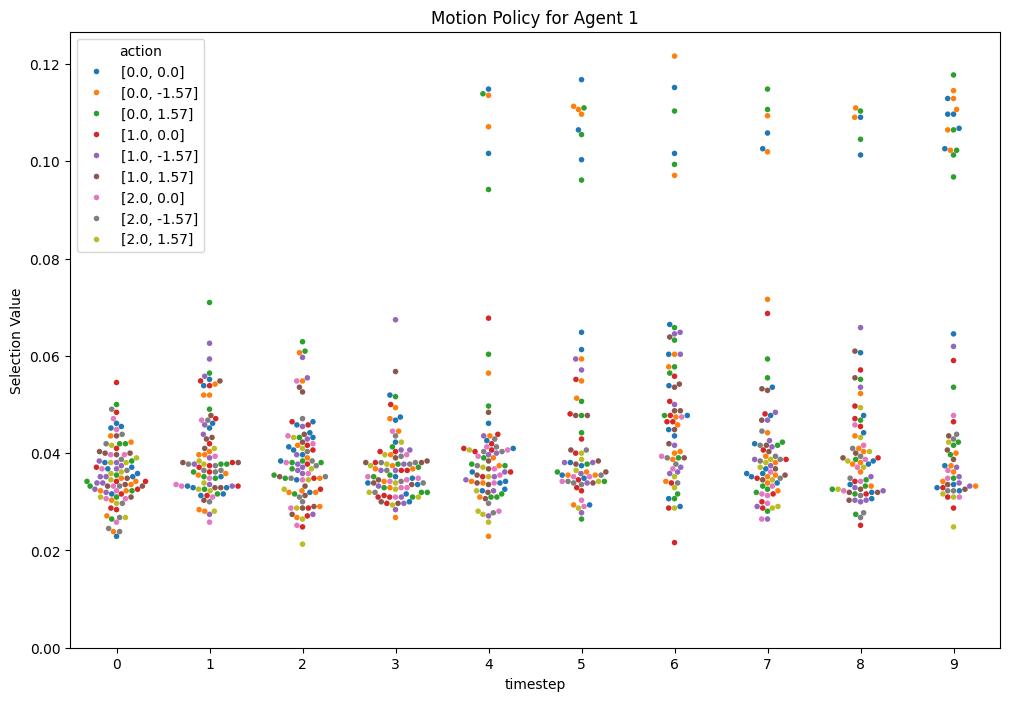

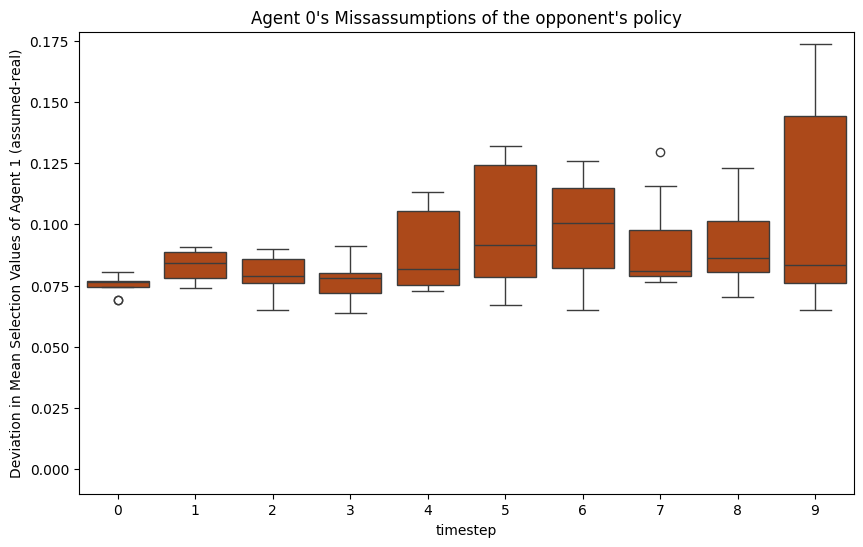

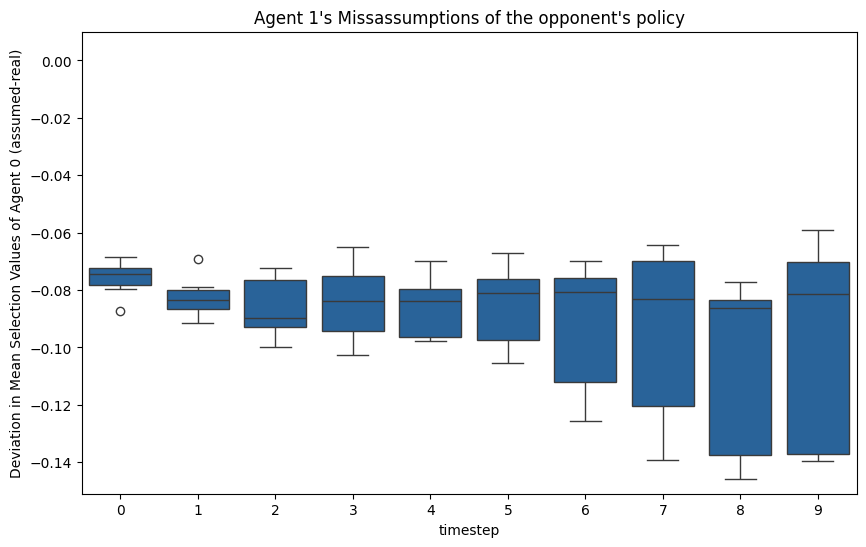

In [3]:
for folder in os.listdir(curr_folder):
    result_dir = os.path.join(main_dir, "results/", exp_name, folder)
    print(result_dir)
    if not os.path.exists(result_dir):
        os.makedirs(result_dir)

    if os.path.isdir(os.path.join(curr_folder, folder)):
        exp_folder = os.path.join(curr_folder, folder)
    else:
        continue
    if not "policy_data.csv" in os.listdir(exp_folder):
        continue

    print(exp_folder)

    # Load the data into a pandas DataFrame
    data = pd.read_csv(os.path.join(exp_folder, 'policy_data.csv'))

    # color palette
    num_actions_0 = len(data['action'].unique())
    num_actions_1 = len(data['action'].unique())
    orange_colors = plt.cm.Oranges(np.linspace(0.2, 0.8, 9))
    blue_colors = plt.cm.Blues(np.linspace(0.2, 0.8, 9))
    palette_0 = {"[0.0, 0.0]": orange_colors[0], 
                "[0.0, -1.57]": orange_colors[1],
                "[0.0, 1.57]": orange_colors[2],
                "[1.0, 0.0]": orange_colors[3],
                    "[1.0, -1.57]": orange_colors[4],
                    "[1.0, 1.57]": orange_colors[5],
                    "[2.0, 0.0]": orange_colors[6],
                    "[2.0, -1.57]": orange_colors[7],
                    "[2.0, 1.57]": orange_colors[8],}
    palette_1 = {"[0.0, 0.0]": blue_colors[0],
                    "[0.0, -1.57]": blue_colors[1],
                    "[0.0, 1.57]": blue_colors[2],
                    "[1.0, 0.0]": blue_colors[3],
                        "[1.0, -1.57]": blue_colors[4],
                        "[1.0, 1.57]": blue_colors[5],
                        "[2.0, 0.0]": blue_colors[6],
                        "[2.0, -1.57]": blue_colors[7],
                        "[2.0, 1.57]": blue_colors[8],}
    markers_0 = {"[0.0, 0.0]": "o",
                "[0.0, -1.57]": "<",
                "[0.0, 1.57]": ">",
                "[1.0, 0.0]": "^",
                    "[1.0, -1.57]": "<",
                    "[1.0, 1.57]": ">",
                    "[2.0, 0.0]": "^",
                    "[2.0, -1.57]": "<",
                    "[2.0, 1.57]": ">"}
    markers_1 = {"[0.0, 0.0]": "o",
                    "[0.0, -1.57]": "<",
                    "[0.0, 1.57]": ">",
                    "[1.0, 0.0]": "^",
                        "[1.0, -1.57]": "<",
                        "[1.0, 1.57]": ">",
                        "[2.0, 0.0]": "^",
                        "[2.0, -1.57]": "<",
                        "[2.0, 1.57]": ">"}

    action_order = ["[0.0, 0.0]", "[0.0, -1.57]", "[0.0, 1.57]", "[1.0, 0.0]", "[1.0, -1.57]", "[1.0, 1.57]", "[2.0, 0.0]", "[2.0, -1.57]", "[2.0, 1.57]"]
    action_order_0 = action_order[:num_actions_0]
    action_order_1 = action_order[:num_actions_1]


    ##### Motion Decision for Agent 0

    # Filter the DataFrame for each agent where "data_of_agent" and "agent" equal the index
    data_agent_0 = data[(data['agent'] == 0) & (data['data_of_agent'] == 0)]

    #data_timestep_3 = data_agent_0[data_agent_0['timestep'] == 3]
    #print(data_timestep_3)

    """# Create a boxplot
    plt.figure(figsize=(10, 6))
    plt.ylabel('Selection Value')
    plt.xlabel('Timestep k')
    box_plot = sns.boxplot(data=data_agent_0, x='timestep', y='selection_value', hue='action')
    # Set y-axis to logarithmic scale

    # Display the plot
    plt.title('Motion Decision for Agent 0')"""

    # Draw a categorical scatterplot to show each observation
    plt.figure(figsize=(12, 8))
    plt.ylabel('Selection Value')
    ax = sns.swarmplot(data=data_agent_0, x="timestep", y="selection_value", hue="action", hue_order=action_order_0, s=4)
    plt.title('Motion Policy for Agent 0')
    plt.ylim(bottom=0)
    plt.savefig(os.path.join(result_dir, 'Motion Policy for Agent 0.png'))


    ##### Motion Decision for Agent 1

    # Load the data into a pandas DataFrame
    data = pd.read_csv(os.path.join(exp_folder, 'policy_data.csv'))

    # Filter the DataFrame for each agent where "data_of_agent" and "agent" equal the index
    data_agent_1 = data[(data['agent'] == 1) & (data['data_of_agent'] == 1)]

    #data_timestep_3 = data_agent_0[data_agent_0['timestep'] == 3]
    #print(data_timestep_3)

    """# Create a boxplot
    plt.figure(figsize=(10, 6))
    plt.ylabel('Selection Value')
    box_plot = sns.boxplot(data=data_agent_1, x='timestep', y='selection_value', hue='action')
    # Set y-axis to logarithmic scale

    # Display the plot
    plt.title('Motion Decision for Agent 1')
    plt.show()
    """
    # Draw a categorical scatterplot to show each observation
    plt.figure(figsize=(12, 8))
    plt.ylabel('Selection Value')
    ax = sns.swarmplot(data=data_agent_1, x="timestep", y="selection_value", hue="action", hue_order=action_order_1, s=4)
    plt.title('Motion Policy for Agent 1')
    plt.ylim(bottom=0)
    plt.savefig(os.path.join(result_dir, 'Motion Policy for Agent 1.png'))


    #### Deviation Decision Agent 0-1 vs Agent 1-1

    # Filter the DataFrame for each agent where "data_of_agent" and "agent" equal the index
    data_agent_0_1 = data[(data['agent'] == 1) & (data['data_of_agent'] == 0)]
    data_agent_1_1 = data[(data['agent'] == 1) & (data['data_of_agent'] == 1)]


    # Group each dataframe by 'timestep' and 'action', and calculate the mean of 'selection_value'
    mean_data_agent_0_1 = data_agent_0_1.groupby(['timestep', 'action'])['selection_value'].mean().reset_index()
    mean_data_agent_1_1 = data_agent_1_1.groupby(['timestep', 'action'])['selection_value'].mean().reset_index()

    # Merge the resulting dataframes on 'timestep' and 'action'
    merged_mean_data = pd.merge(mean_data_agent_1_1, mean_data_agent_0_1, on=['timestep', 'action'], suffixes=('_real', '_assumed'))

    # Calculate the difference between the 'selection_value' columns
    merged_mean_data['selection_value_diff'] = merged_mean_data['selection_value_assumed'] - merged_mean_data['selection_value_real']

    # Draw a boxplot to show the mean and variance of the difference over time
    plt.figure(figsize=(10, 6))
    plt.ylabel('Deviation in Mean Selection Values of Agent 1 (assumed-real)')
    ax = sns.boxplot(data=merged_mean_data, x="timestep", y="selection_value_diff", color=orange_colors[-1])
    plt.title('Agent 0\'s Missassumptions of the opponent\'s policy')

    """# Get the minimum and maximum values
    whisker_min = min(flattened_whiskers)
    whisker_max = max(flattened_whiskers)
    print(whisker_min, whisker_max)

    # Set the y-limits based on the whiskers
    if whisker_min >= -0.01 and whisker_max <= 0.01:
        plt.ylim(-0.01, 0.01)
    else:
        plt.ylim(whisker_min, whisker_max)"""
    
    # Get the y-limits of the whiskers
    whiskers = [whisker.get_ydata() for whisker in ax.lines]
    # Flatten the list of lists
    flattened_whiskers = [val for sublist in whiskers for val in sublist]

    # Get the y-data of the fliers
    fliers = [flier.get_ydata() for flier in ax.lines if 'flier' in str(flier.get_path())]

    # Flatten the list of lists
    flattened_fliers = [val for sublist in fliers for val in sublist]

    # Get the minimum and maximum values
    val_min = min(flattened_fliers) if flattened_fliers else min(flattened_whiskers)
    val_max = max(flattened_fliers) if flattened_fliers else max(flattened_whiskers)

    # Set the y-limits based on the whiskers
    if val_min <= -0.01:
        plt.ylim(bottom=val_min-0.005)
    else:
        plt.ylim(bottom=-0.01)

    if val_max >= 0.01:
        plt.ylim(top=val_max+0.005)
    else:
        plt.ylim(top=0.01)
    

    plt.savefig(os.path.join(result_dir, 'Agent 0\'s Missassumptions of the opponent\'s policy.png'))

    #### Deviation Decision Agent 0-0 vs Agent 1-0

    # Filter the DataFrame for each agent where "data_of_agent" and "agent" equal the index
    data_agent_0_0 = data[(data['agent'] == 0) & (data['data_of_agent'] == 0)]
    data_agent_1_0 = data[(data['agent'] == 0) & (data['data_of_agent'] == 1)]

    # Group each dataframe by 'timestep' and 'action', and calculate the mean of 'selection_value'
    mean_data_agent_0_0 = data_agent_0_0.groupby(['timestep', 'action'])['selection_value'].mean().reset_index()
    mean_data_agent_1_0 = data_agent_1_0.groupby(['timestep', 'action'])['selection_value'].mean().reset_index()

    # Merge the resulting dataframes on 'timestep' and 'action'
    merged_mean_data = pd.merge(mean_data_agent_0_0, mean_data_agent_1_0, on=['timestep', 'action'], suffixes=('_real', '_assumed'))

    # Calculate the difference between the 'selection_value' columns
    merged_mean_data['selection_value_diff'] = merged_mean_data['selection_value_assumed'] - merged_mean_data['selection_value_real']

    # Draw a boxplot to show the mean and variance of the difference over time
    plt.figure(figsize=(10, 6))
    plt.ylabel('Deviation in Mean Selection Values of Agent 0 (assumed-real)')
    ax = sns.boxplot(data=merged_mean_data, x="timestep", y="selection_value_diff", color=blue_colors[-1])
    plt.title('Agent 1\'s Missassumptions of the opponent\'s policy')
    
    """# Get the y-limits of the whiskers
    whiskers = [whisker.get_ydata() for whisker in ax.lines]
    # Flatten the list of lists
    flattened_whiskers = [val for sublist in whiskers for val in sublist]

    # Get the minimum and maximum values
    whisker_min = min(flattened_whiskers)
    whisker_max = max(flattened_whiskers)
    print(whisker_min, whisker_max)


    # Set the y-limits based on the whiskers
    if whisker_min >= -0.01 and whisker_max <= 0.01:
        plt.ylim(-0.01, 0.01)
    else:
        plt.ylim(whisker_min, whisker_max)"""

    # Get the y-limits of the whiskers
    whiskers = [whisker.get_ydata() for whisker in ax.lines]
    # Flatten the list of lists
    flattened_whiskers = [val for sublist in whiskers for val in sublist]
    
    fliers = [flier.get_ydata() for flier in ax.lines if 'flier' in str(flier.get_path())]

    # Flatten the list of lists
    flattened_fliers = [val for sublist in fliers for val in sublist]

    # Get the minimum and maximum values
    val_min = min(flattened_fliers) if flattened_fliers else min(flattened_whiskers)
    val_max = max(flattened_fliers) if flattened_fliers else max(flattened_whiskers)

    # Set the y-limits based on the whiskers
    if val_min <= -0.01:
        plt.ylim(bottom=val_min-0.005)
    else:
        plt.ylim(bottom=-0.01)

    if val_max >= 0.01:
        plt.ylim(top=val_max+0.005)
    else:
        plt.ylim(top=0.01)

    plt.savefig(os.path.join(result_dir, 'Agent 1\'s Missassumptions of the opponent\'s policy.png'))